<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/5NMy6YWx/4l.png" style="display: block; margin-left: auto; margin-right: auto;">

<img src="https://i.postimg.cc/8sgswH3F/Predicting-Liver-Disease.jpg">

<a id="import"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

<a id="read"></a>
# <p style="background-color:purple ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df=pd.read_csv("Liver-Disease.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<a id="preprocessing"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Preprocessing</p>

In [7]:
#Which features are available in the dataset?

df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
#Check for any null values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null.

In [9]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


#### Replacing the null values with mean.

In [10]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [11]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [12]:
#Check for any null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### The null values are replaced with mean.

In [13]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

#### Convert categorical variable "Gender" to indicator variables

In [14]:
#pd.get_dummies(df['Gender'], prefix = 'Gender').head()

In [15]:
#df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<a id="eda"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


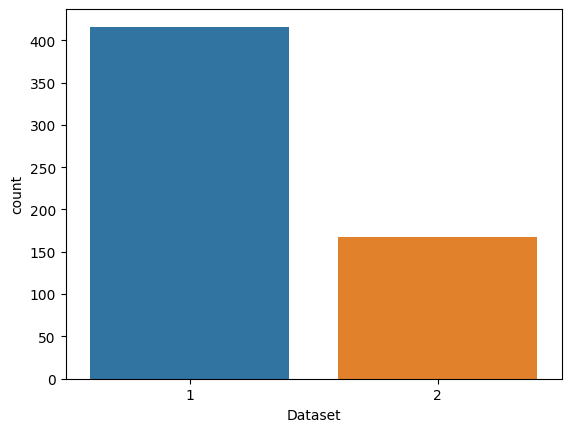

In [17]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)


Number of patients that are male:  441
Number of patients that are female:  142


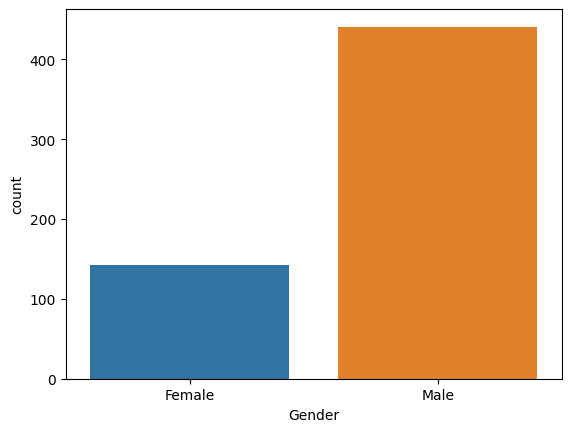

In [18]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)


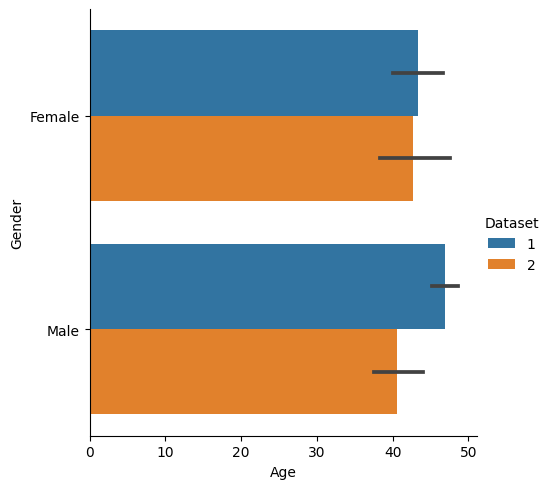

In [19]:

sns.catplot(x="Age", y="Gender", hue="Dataset", data=df,kind="bar" )


#### Age seems to be a factor for liver disease for both male and female genders

In [20]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [21]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)


,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


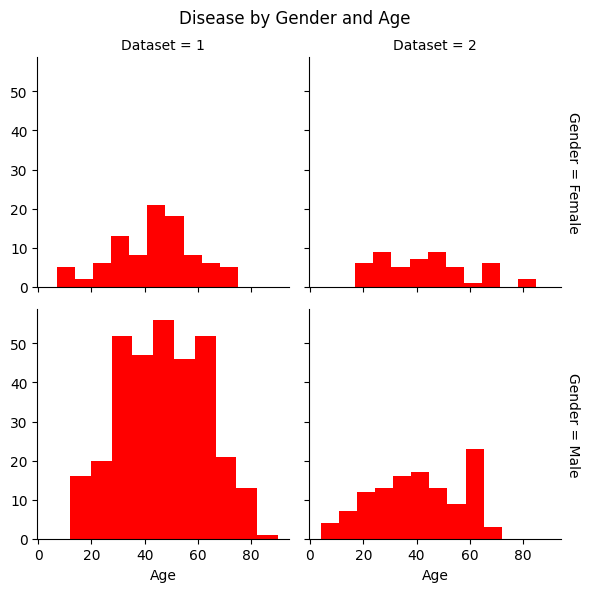

In [22]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

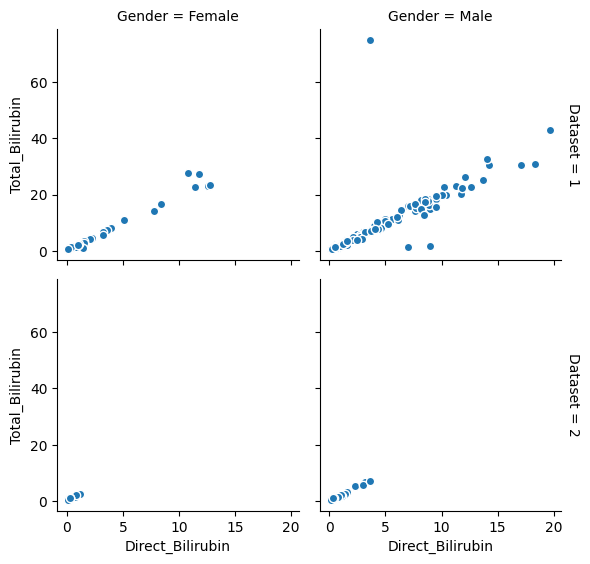

In [23]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

#### There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. So we have the possibility of removing one of this feature.

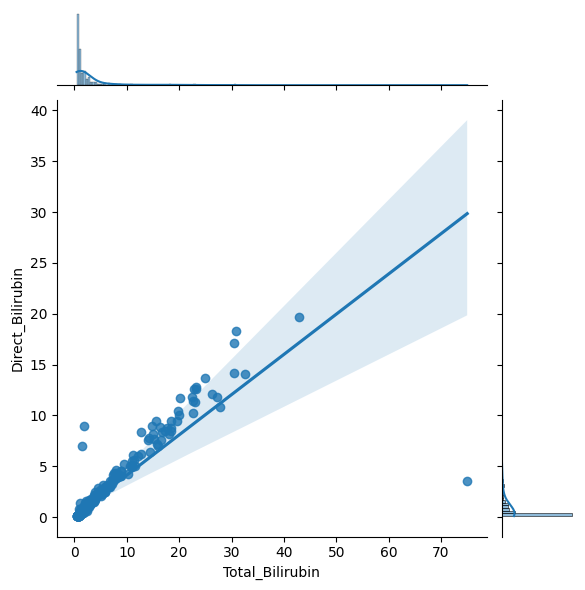

In [24]:

sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=df, kind="reg")


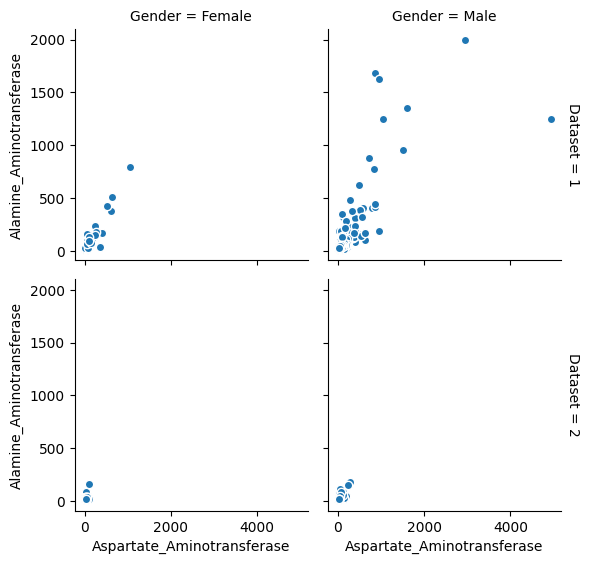

In [25]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)



#### There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.


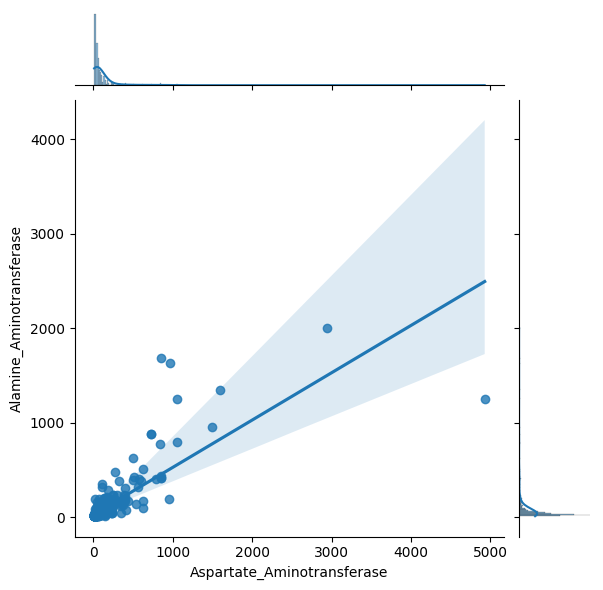

In [26]:
sns.jointplot(x= "Aspartate_Aminotransferase", y="Alamine_Aminotransferase", data=df, kind="reg")


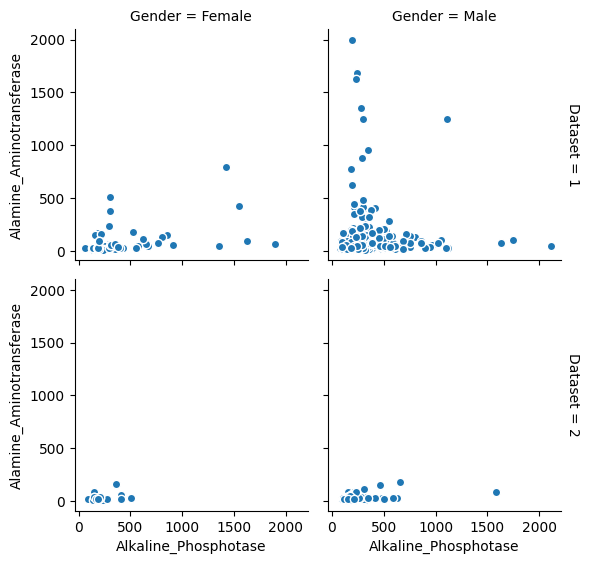

In [27]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)


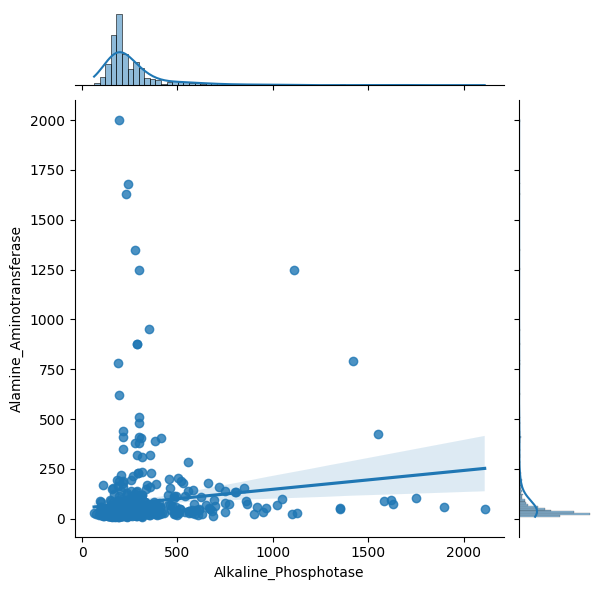

In [28]:
sns.jointplot(x="Alkaline_Phosphotase", y= "Alamine_Aminotransferase", data=df, kind="reg")




#### No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase


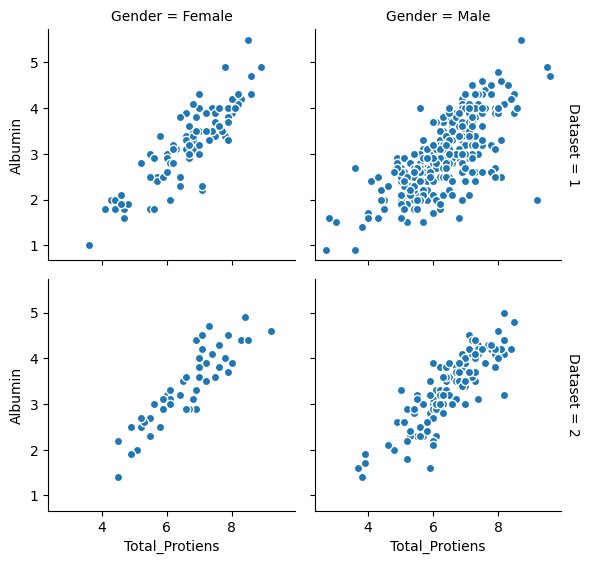

In [29]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)




#### There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.


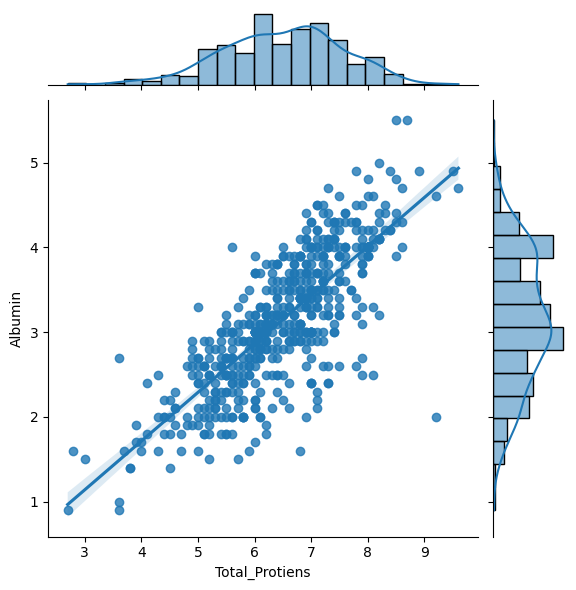

In [30]:
sns.jointplot(x="Total_Protiens", y="Albumin", data=df, kind="reg")


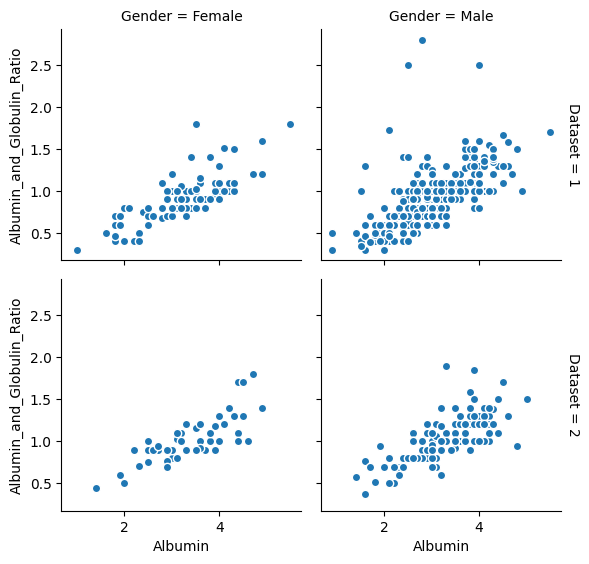

In [31]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)



#### There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

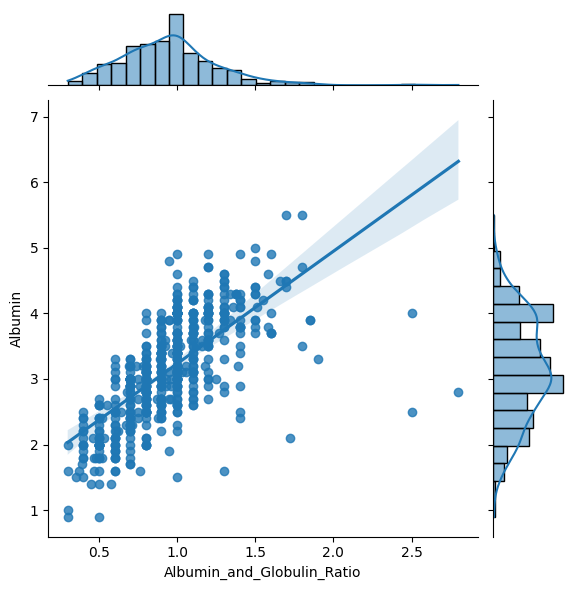

In [32]:
sns.jointplot(x="Albumin_and_Globulin_Ratio", y="Albumin", data=df, kind="reg")



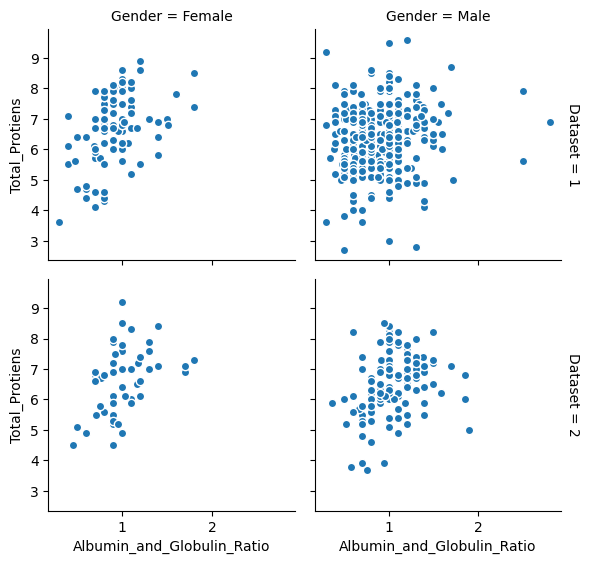

In [33]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)


# **LabelEncoder**

In [34]:
cat_cols = ['Gender']

In [35]:
le = LabelEncoder()

In [36]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1



## Observation:

 From the above jointplots and scatterplots, we find direct relationship between the following features:
 
 Direct_Bilirubin & Total_Bilirubin
 
 Aspartate_Aminotransferase & Alamine_Aminotransferase
 
 Total_Protiens & Albumin
 
 Albumin_and_Globulin_Ratio & Albumin

 Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:
 
 Total_Bilirubin
 
 Alamine_Aminotransferase
 
Total_Protiens

 Albumin_and_Globulin_Ratio
 
Albumin



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 |  Model Building</p>

In [38]:
X=df.drop(['Dataset'],axis=1)
y=df['Dataset']

In [39]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [40]:
# Correlation
liver_corr = X.corr()

In [41]:
liver_corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


In [42]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [44]:
y


0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

The above correlation also indicates the following correlation

 Total_Protiens & Albumin
 
 Alamine_Aminotransferase & Aspartate_Aminotransferase
 
 Direct_Bilirubin & Total_Bilirubin
 
 There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin


<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 |  LogisticRegression Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 6.1 |</span><span style='color:purple'> LogisticRegression</span></b>

In [45]:
log_clf = LogisticRegression(max_iter = 1000, random_state = 42)
log_clf.fit(X_train, y_train)
log_score = log_clf.score(X_test, y_test)
log_score

0.7257142857142858

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 6.2 |</span><span style='color:purple'> Hyper Tuning Logistic Regression</span></b>

In [46]:
from sklearn.model_selection import GridSearchCV
log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 42),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(X_train, y_train)
log_tuned_score = log_gscv.score(X_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.7314285714285714

In [47]:
log_gscv.best_params_

{'C': 86.85113737513521,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 6.3 |</span><span style='color:purple'> Log Model Evaluation</span></b>

In [48]:
log_predictions = log_gscv.predict(X_test)

In [49]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83       128
           2       0.50      0.28      0.36        47

    accuracy                           0.73       175
   macro avg       0.64      0.59      0.59       175
weighted avg       0.70      0.73      0.70       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 |  KNeighborsClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 7.1 |</span><span style='color:purple'> KNeighborsClassifier</span></b>

In [50]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_score = knn_clf.score(X_test, y_test)
knn_score

0.6971428571428572

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 7.2 |</span><span style='color:purple'> Hyper Tuning KNeighborsClassifier</span></b>

In [51]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20],
            'p':[1,2], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(X_train, y_train)
knn_tuned_score = knn_gscv.score(X_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


0.7142857142857143

In [52]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 7.3 |</span><span style='color:purple'> KNN Model Evaluation</span></b>

In [53]:
knn_predictions = knn_gscv.predict(X_test)

In [54]:
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           1       0.77      0.88      0.82       128
           2       0.45      0.28      0.34        47

    accuracy                           0.71       175
   macro avg       0.61      0.58      0.58       175
weighted avg       0.68      0.71      0.69       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |  Support Vector Classifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 8.1 |</span><span style='color:purple'> Support Vector Classifier</span></b>

In [55]:
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(X_train, y_train)
svc_score = svc_clf.score(X_test, y_test)
svc_score

0.7314285714285714

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 8.2 |</span><span style='color:purple'> Hyper Tuning Support Vector Classifier</span></b>

In [56]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(X_train, y_train)
svc_tuned_score = log_gscv.score(X_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.7314285714285714

In [57]:
svc_gscv.best_params_

{'C': 784.7599703514607, 'degree': 2, 'kernel': 'rbf'}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 8.3 |</span><span style='color:purple'> SVC Model Evaluation</span></b>

In [58]:
svc_predictions = svc_gscv.predict(X_test)

In [59]:
print(classification_report(y_test, svc_predictions))


              precision    recall  f1-score   support

           1       0.72      0.96      0.83       128
           2       0.00      0.00      0.00        47

    accuracy                           0.70       175
   macro avg       0.36      0.48      0.41       175
weighted avg       0.53      0.70      0.60       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 |  RandomForestClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 9.1 |</span><span style='color:purple'> RandomForestClassifier</span></b>

In [60]:
rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(X_train, y_train)
ranf_score = rand_clf.score(X_test, y_test)
ranf_score

0.7257142857142858

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 9.2 |</span><span style='color:purple'> Hyper Tuning RandomForestClassifier</span></b>

In [61]:
rand_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    
}

ranf_gscv = GridSearchCV(rand_clf, param_grid=rand_grid, cv=5, verbose=1, n_jobs=-1)

ranf_gscv.fit(X_train, y_train)
ranf_tuned_score = ranf_gscv.score(X_test, y_test)
ranf_tuned_score

Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.7257142857142858

In [62]:
ranf_gscv.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 9.3 |</span><span style='color:purple'> RandomForestClassifier Model Evaluation</span></b>

In [63]:
ran_predictions = ranf_gscv.predict(X_test)

In [64]:
print(classification_report(y_test, ran_predictions))

              precision    recall  f1-score   support

           1       0.79      0.86      0.82       128
           2       0.49      0.36      0.41        47

    accuracy                           0.73       175
   macro avg       0.64      0.61      0.62       175
weighted avg       0.71      0.73      0.71       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 |  GradientBoostingClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 10.1 |</span><span style='color:purple'> GradientBoostingClassifier</span></b>

In [65]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_score = gbc.score(X_test, y_test)
gbc_score

0.7028571428571428

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 10.2 |</span><span style='color:purple'> Hyper Tuning GradientBoostingClassifier</span></b>

In [66]:
gbc_grid = {'learning_rate': [0.1, 0.01],
            'n_estimators': [100, 500, 1000],
            'max_depth': [2, 3]}


gbc_gscv = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_gscv.fit(X_train, y_train)
gbc_tuned_score = gbc_gscv.score(X_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.7142857142857143

In [67]:
gbc_gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 10.3 |</span><span style='color:purple'> GradientBoostingClassifier Model Evaluation</span></b>

In [68]:
gbc_predictions = gbc_gscv.predict(X_test)

In [69]:
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           1       0.76      0.90      0.82       128
           2       0.43      0.21      0.29        47

    accuracy                           0.71       175
   macro avg       0.60      0.56      0.55       175
weighted avg       0.67      0.71      0.68       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 |  DecisionTreeClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:dark-purple'>Step 11.1 |</span><span style='color:purple'> DecisionTreeClassifier</span></b>

In [70]:
dtc_clf = DecisionTreeClassifier(random_state = 4)
dtc_clf.fit(X_train, y_train)
dtc_score = dtc_clf.score(X_test, y_test)
dtc_score

0.68

____
<a id="svm_hp"></a>
# <b><span style='color:darl-purple'>Step 11.2 |</span><span style='color:purple'> Hyper Tuning DecisionTreeClassifier</span></b>

In [71]:
dtc_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_gscv = GridSearchCV(dtc_clf, param_grid=dtc_grid, cv=5, verbose=1, n_jobs=-1)
dtc_gscv.fit(X_train, y_train)
dtc_tuned_score = dtc_gscv.score(X_test, y_test)
dtc_tuned_score

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.6857142857142857

In [72]:
dtc_gscv.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

____
<a id="svm_eval"></a>
# <b><span style='color:dark-purple'>Step 11.3 |</span><span style='color:purple'> DecisionTreeClassifier Model Evaluation</span></b>

In [73]:
dtc_predictions = dtc_gscv.predict(X_test)

In [74]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           1       0.77      0.80      0.79       128
           2       0.40      0.36      0.38        47

    accuracy                           0.69       175
   macro avg       0.59      0.58      0.59       175
weighted avg       0.68      0.69      0.68       175



<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 |  DataFrame Model </p> 

In [75]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score},
         {'Model':'DecisionTreeClassifier', 'Score': dtc_score, 'Tuned_score': dtc_tuned_score},
         {'Model':'RandomForestClassifier', 'Score': ranf_score, 'Tuned_score': ranf_tuned_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score}]

In [76]:
result = pd.DataFrame(score, columns=['Model','Score','Tuned_score'])
result.sort_values(by='Tuned_score', ascending=False)

,Model,Score,Tuned_score
0,Logistic Regression,0.725714,0.731429
1,SVC,0.731429,0.731429
4,RandomForestClassifier,0.725714,0.725714
2,KNN,0.697143,0.714286
5,Gradient Boosting,0.702857,0.714286
3,DecisionTreeClassifier,0.680000,0.685714


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:red">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>Logistic Regression</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:yellow">So, We choose <mark> Logistic Regression </mark></span>
</div>

# **LOC ROWS**

In [77]:
df.loc[300:300:].T

,300
Age,58.0
Gender,1.0
Total_Bilirubin,0.8
Direct_Bilirubin,0.2
Alkaline_Phosphotase,180.0
Alamine_Aminotransferase,32.0
Aspartate_Aminotransferase,25.0
Total_Protiens,8.2
Albumin,4.4
Albumin_and_Globulin_Ratio,1.1


<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13 |  Making a Predictive System </p>

In [79]:
input_data = (58.0,1.0,0.8,0.2,180.0,32.0,25.0,8.2,4.4,1.1)


# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = log_gscv.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have Liver Disease')
else:
    print('The person have a Liver Problem')

[1]
The person have a Liver Problem


<a id="svm"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 14 |  Saving the trained model </p>

In [80]:
import pickle

In [81]:
filename = 'liver_model.sav'
pickle.dump(log_gscv, open(filename, 'wb'))

In [82]:
# loading the saved model
loaded_model = pickle.load(open('liver_model.sav', 'rb'))

In [83]:
input_data = (58.0,1.0,0.8,0.2,180.0,32.0,25.0,8.2,4.4,1.1)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have Liver Problem')
else:
    print('The person have a Liver Problem')

[1]
The person have a Liver Problem


In [84]:
for column in X.columns:
  print(column)

Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
